# Technical Task

In [12]:
#Table One
import pandas as pd
tz1 = pd.DataFrame({ ' ':['Example, kE/1 turbine (baseData)','Min Max Range'], 'Turbine EXW':['2000 kE','40%'],'Transport':['1000 kE','40%'], 'Customizations':['1000 kE','40%'],'Hub activities':['500 kE','40%'],
'Hub rental':['500 kE','40%'],'Installation':['500 kE','40%'],'Commissioning':['700 kE','40%'],'Commissioning vessel':['1000 kE','40%'],'Installation vessel':['700 kE','40%']})
tz1

,,Turbine EXW,Transport,Customizations,Hub activities,Hub rental,Installation,Commissioning,Commissioning vessel,Installation vessel
0,"Example, kE/1 turbine (baseData)",2000 kE,1000 kE,1000 kE,500 kE,500 kE,500 kE,700 kE,1000 kE,700 kE
1,Min Max Range,40%,40%,40%,40%,40%,40%,40%,40%,40%


In [13]:
#Table Two
tz2 = pd.DataFrame({ ' ':['Example (baseData)','Min Max Range'], 'Wind speed':['10 m/s','±2 m/s'],'Air density':['1,12','1.1-1.3'], 'Water depth':['24 mt','0-60'],
'Country':['US','Any'],'Inflation':['2%','1-5.5']})

tz2

,,Wind speed,Air density,Water depth,Country,Inflation
0,Example (baseData),10 m/s,"1,12",24 mt,US,2%
1,Min Max Range,±2 m/s,1.1-1.3,0-60,Any,1-5.5


In [14]:
#Table Three
tz2 = pd.DataFrame({ ' ':['Example (baseData)','Min Max Range'], 'Project launch year NTP':['2021','Up to 2025'],'Installation year':['2023','Up to 2030'],
                    'Distance from shore':['30km','0-150'],'Distance from hub':['40km','0-150'],'Number of units':['46 turbines','10 to 300'],
                    'Site area':['100km','30 to 300'],'Weather':['60','1 to 100'],'Losses of production':['14%','10% to 20%']
                    })

tz2

,,Project launch year NTP,Installation year,Distance from shore,Distance from hub,Number of units,Site area,Weather,Losses of production
0,Example (baseData),2021,2023,30km,40km,46 turbines,100km,60,14%
1,Min Max Range,Up to 2025,Up to 2030,0-150,0-150,10 to 300,30 to 300,1 to 100,10% to 20%


# Data Generator

In [15]:
#header = ['','Turbine EXW','Transport','Customizations','Hub activities','Hub rental','Installation','Commissioning','Commissioning vessel','Installation vessel']

In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
noise = 5

def dataGenerator(minValue,maxValue,baseData,size,type):
  dataset = []
  if type == '%':
    for i in range(0,size):
      my_randoms = round(random.uniform(minValue, maxValue),2)
      percent = my_randoms
      datainp = round((baseData * (percent/100)),2)
      data = baseData + datainp
      #print("The "+str(percent)+"% of "+str(baseData)+ " is: " + str(datainp) +" and total data "+ str(data))
      dataset.append(data)
    return dataset
  if type == 'other':
    for i in range(0,size):
      my_randoms = round(random.uniform(minValue, maxValue),2)
      data = baseData + my_randoms
      dataset.append(data)
    return dataset
  if type == 'int':
    for i in range(0,size):
      my_randoms = random.randint(minValue, maxValue)
      data = baseData + my_randoms
      dataset.append(data)
    return dataset
  if type == 'seq %':
    startData = baseData+(baseData/100*minValue)
    lastData = baseData+(baseData/100*maxValue)
    deltaData = lastData-startData
    trendSumm = deltaData/size
    seqData = startData
    for i in range(1,size+1):
      my_randoms = round(random.uniform(-noise, noise),2)
      percent = my_randoms
      datainp = round((seqData * (percent/100)),2)
      #seqData = seqData+trendSumm*i # ±5%
      data = (seqData + datainp)+trendSumm*i
      #print("The "+str(percent)+"% of "+str(baseData)+ " is: " + str(datainp) +" and total data "+ str(data))
      dataset.append(data)
    return dataset
  if type == 'GAUSS':
    if abs(minValue)==abs(maxValue):
      deviation = abs(baseData/100*minValue)
      dataset = np.random.normal(baseData,deviation/3,size)
      dataset = sorted(dataset)
    else:
      print("your deviation of the base isn't same (minValue != maxValue)")
    return dataset
  else:
    print("wrong type to generate the data")

# Table №1

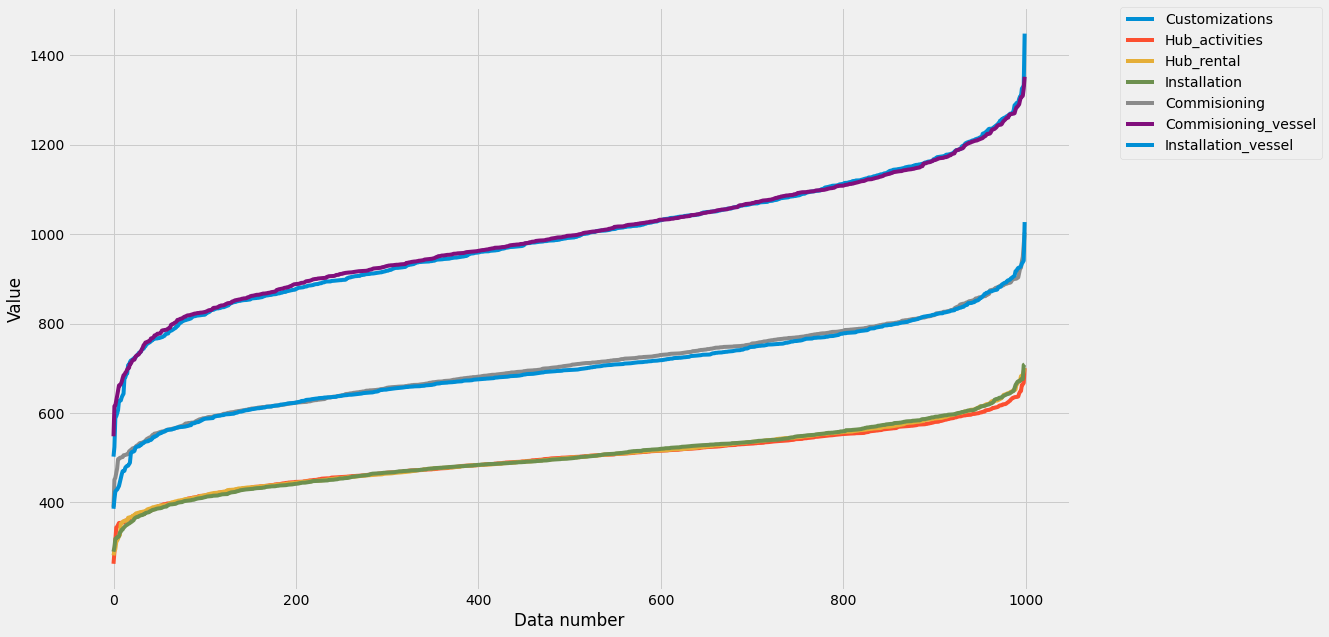

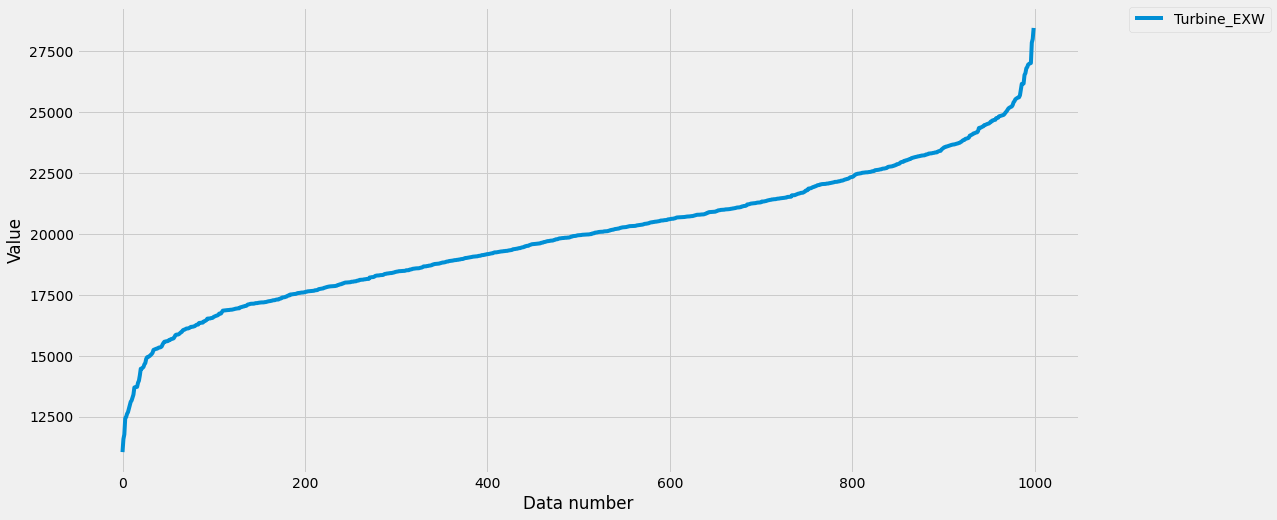

In [17]:
size = 1000
Turbine_EXW = np.array(dataGenerator(-40,40,20000,size,'GAUSS'))
Transport = np.array(dataGenerator(-40,40,1000,size,'GAUSS'))
Customizations = np.array(dataGenerator(-40,40,1000,size,'GAUSS'))
Hub_activities = np.array(dataGenerator(-40,40,500,size,'GAUSS'))
Hub_rental = np.array(dataGenerator(-40,40,500,size,'GAUSS'))
Installation = np.array(dataGenerator(-40,40,500,size,'GAUSS'))
Commisioning = np.array(dataGenerator(-40,40,700,size,'GAUSS'))
Commisioning_vessel = np.array(dataGenerator(-40,40,1000,size,'GAUSS'))
Installation_vessel = np.array(dataGenerator(-40,40,700,size,'GAUSS'))

plt.figure(figsize=(16,10))

plt.plot(Customizations, label="Customizations")
plt.plot(Hub_activities, label="Hub_activities")
plt.plot(Hub_rental, label="Hub_rental")
plt.plot(Installation, label="Installation")
plt.plot(Commisioning, label="Commisioning")
plt.plot(Commisioning_vessel, label="Commisioning_vessel")
plt.plot(Installation_vessel, label="Installation_vessel")



plt.ylabel('Value')
plt.xlabel('Data number')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.figure(figsize=(16,8))
plt.plot(Turbine_EXW, label="Turbine_EXW")
plt.ylabel('Value')
plt.xlabel('Data number')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()




In [18]:
import pandas as pd
df = pd.DataFrame({ 'ID': range(0,size), 'Turbine EXW':Turbine_EXW, 'Transport':Transport, 
                    'Customizations':Customizations,
                   'Hub activities':Hub_activities,
                   'Hub rental':Hub_rental,
                   'Installation':Installation,
                   'Commissioning':Commisioning,
                   'Commissioning vessel':Commisioning_vessel,
                   'Installation vessel':Installation_vessel
                   })

In [19]:
#
df.info()
df.to_csv ('tableOne.csv', index = False, header=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1000 non-null   int64  
 1   Turbine EXW           1000 non-null   float64
 2   Transport             1000 non-null   float64
 3   Customizations        1000 non-null   float64
 4   Hub activities        1000 non-null   float64
 5   Hub rental            1000 non-null   float64
 6   Installation          1000 non-null   float64
 7   Commissioning         1000 non-null   float64
 8   Commissioning vessel  1000 non-null   float64
 9   Installation vessel   1000 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 78.2 KB


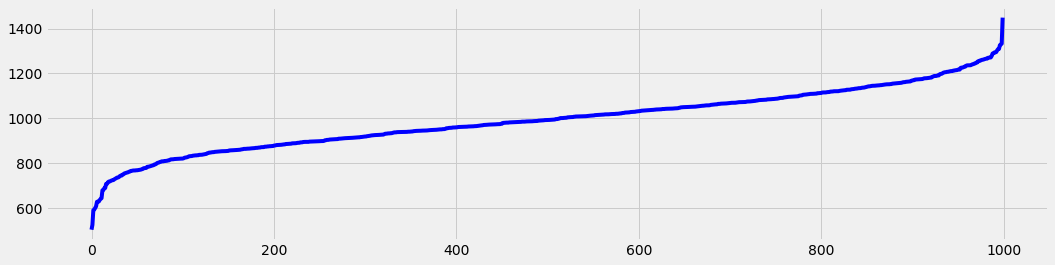

In [20]:
fig = plt.figure(figsize=(16,4))
ax = plt.axes()
ax.plot(df['ID'],df['Customizations'],color='blue')

In [21]:
dataFromCSV = pd.read_csv('tableOne.csv')
dataFromCSV

,ID,Turbine EXW,Transport,Customizations,Hub activities,Hub rental,Installation,Commissioning,Commissioning vessel,Installation vessel
0,0,11041.682389,663.013056,502.419725,262.720236,281.461610,289.785651,390.102211,547.961291,385.844899
1,1,11573.091923,670.655137,524.012344,287.867066,292.400261,299.857084,450.788582,615.301455,407.153144
2,2,11765.714836,674.513719,589.315677,314.900162,295.411580,318.717597,454.999984,617.218273,424.294528
3,3,12437.894565,696.589966,592.712365,343.774837,311.156895,319.400146,465.340779,627.252068,427.224679
4,4,12482.751844,703.185826,599.078255,345.575052,314.985219,322.394768,476.107724,638.464222,428.868138
...,...,...,...,...,...,...,...,...,...,...
995,995,26979.843319,1332.597899,1308.977543,649.257009,682.477068,675.641267,924.893597,1306.357166,928.985590
996,996,26989.542786,1350.388936,1325.910825,662.978464,683.691243,675.835418,939.351266,1307.551218,934.682512
997,997,27827.345900,1376.664848,1328.834297,664.059081,686.178971,676.092215,949.391235,1309.607839,937.363767
998,998,27977.421523,1381.144542,1332.648485,667.301125,693.825077,707.622655,976.308481,1325.657713,940.971488


# Table №2

In [22]:
countries_csv = pd.read_csv('countries.csv')
countries_csv['alpha2']

0      af
1      al
2      dz
3      ad
4      ao
       ..
188    ve
189    vn
190    ye
191    zm
192    zw
Name: alpha2, Length: 193, dtype: object

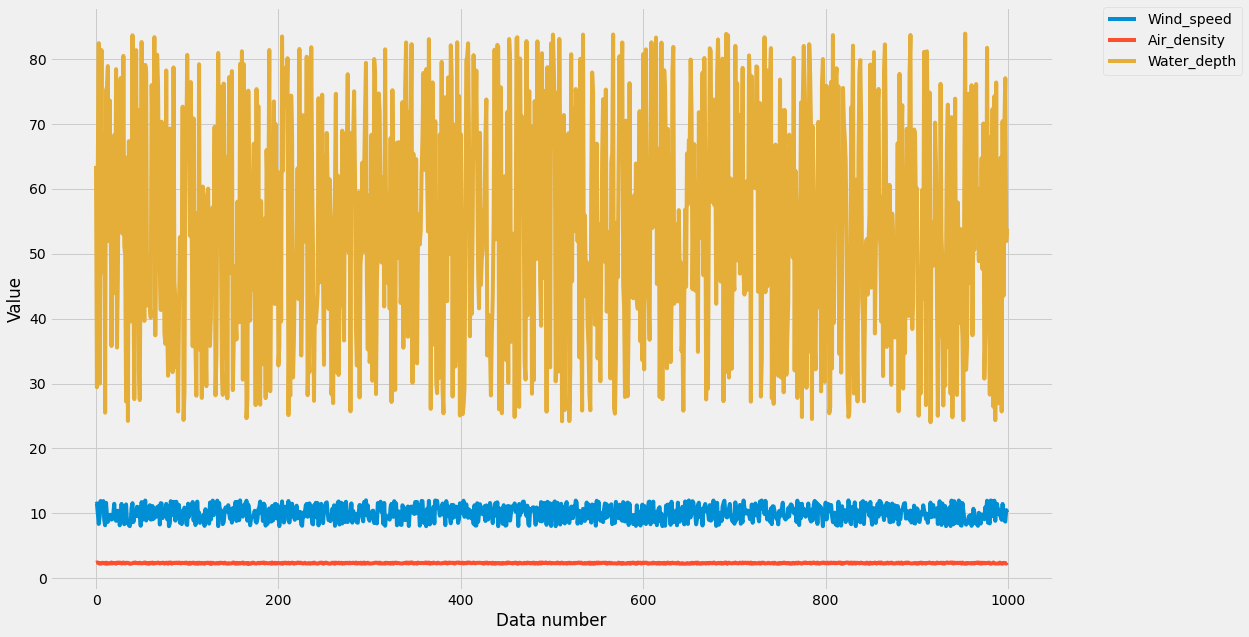

array([3.48, 3.57, 6.67, 3.01, 4.05, 7.06, 6.57, 3.12, 7.24, 3.73, 7.08,
       5.02, 6.17, 5.48, 7.16, 4.45, 3.54, 4.22, 4.51, 5.95, 3.34, 5.28,
       6.28, 6.  , 5.25, 6.61, 6.36, 5.88, 6.45, 6.36, 5.9 , 5.46, 5.52,
       3.96, 4.39, 5.02, 5.34, 5.39, 4.15, 4.71, 4.  , 4.52, 5.13, 4.85,
       6.13, 5.91, 3.51, 4.76, 6.3 , 4.81, 5.22, 3.81, 5.63, 6.17, 4.43,
       3.67, 6.06, 6.16, 6.12, 7.48, 3.67, 6.98, 6.28, 7.2 , 5.  , 6.22,
       6.95, 3.92, 3.25, 7.16, 3.36, 5.58, 7.31, 4.5 , 5.76, 6.29, 6.58,
       3.36, 4.81, 6.17, 7.04, 5.9 , 6.05, 6.99, 6.01, 6.02, 5.84, 7.27,
       5.06, 5.32, 5.72, 4.26, 5.12, 4.71, 5.28, 5.77, 5.61, 5.6 , 3.34,
       5.72, 3.34, 3.98, 3.3 , 5.63, 6.68, 5.03, 4.23, 5.02, 4.13, 6.19,
       7.44, 3.24, 3.72, 5.47, 6.29, 6.05, 5.29, 3.37, 6.23, 5.04, 6.01,
       7.4 , 4.98, 4.42, 5.76, 6.08, 3.65, 5.92, 4.57, 4.19, 5.8 , 7.29,
       6.4 , 7.27, 5.72, 6.21, 3.07, 6.87, 3.09, 3.15, 5.34, 7.38, 3.3 ,
       4.68, 3.29, 5.92, 5.61, 5.49, 6.48, 3.28, 5.

In [23]:
#Turbine_EXW = np.array(dataGenerator(-40,40,20000,size,'other'))
Wind_speed = np.array(dataGenerator(-2,2,10,size,'other'))
Air_density = np.array(dataGenerator(1.1,1.3,1.12,size,'other'))
Water_depth = np.array(dataGenerator(0,60,24,size,'other'))

plt.figure(figsize=(16,10))

plt.plot(Wind_speed, label="Wind_speed")
plt.plot(Air_density, label="Air_density")
plt.plot(Water_depth, label="Water_depth")

plt.ylabel('Value')
plt.xlabel('Data number')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

chosen_idx = np.random.choice(192, replace = True, size = size) 
counties = countries_csv.iloc[chosen_idx] 
counties = np.array(counties['alpha2']) 

Inflation = np.array(dataGenerator(1,5.5,2,size,'other')) #For inflation data in percentage
Inflation

In [24]:
#Turbine_EXW = np.array(dataGenerator(-40,40,20000,size,'other'))
Wind_speed = np.array(dataGenerator(-2,2,10,size,'other'))
Air_density = np.array(dataGenerator(1.1,1.3,1.12,size,'other'))
Water_depth = np.array(dataGenerator(0,60,24,size,'other'))

#blob:https://stefangabos.github.io/7e77f337-47b0-4e9e-a94a-c7e38cfae5bc
chosen_idx = np.random.choice(192, replace = True, size = size) 
counties = countries_csv.iloc[chosen_idx] 
counties = np.array(counties['alpha2']) 
Inflation = np.array(dataGenerator(1,5.5,2,size,'other')) #For inflation data in percentage
Inflation

array([4.14, 6.38, 4.61, 7.34, 4.71, 4.55, 3.5 , 6.72, 5.25, 6.54, 3.79,
       3.42, 4.32, 4.55, 4.65, 5.6 , 4.83, 4.55, 3.66, 3.13, 4.1 , 5.64,
       5.06, 3.58, 3.43, 4.57, 3.12, 4.96, 6.28, 5.96, 5.27, 6.63, 7.01,
       3.78, 7.21, 6.02, 6.07, 3.01, 5.7 , 5.56, 4.12, 4.57, 5.26, 5.21,
       7.42, 3.18, 4.64, 4.17, 3.16, 4.43, 3.11, 4.83, 4.12, 4.22, 5.78,
       7.3 , 4.36, 7.32, 4.23, 4.84, 4.45, 6.34, 6.72, 6.9 , 5.74, 6.69,
       3.99, 3.75, 6.56, 4.74, 4.63, 4.32, 3.01, 3.4 , 3.48, 4.48, 7.01,
       6.82, 5.09, 4.1 , 4.32, 5.16, 7.19, 7.08, 4.01, 6.74, 7.3 , 7.02,
       4.08, 6.18, 4.8 , 3.47, 7.29, 3.84, 7.47, 5.52, 6.89, 4.64, 3.25,
       4.9 , 5.65, 6.86, 3.65, 3.49, 3.62, 7.36, 5.77, 6.51, 4.55, 3.98,
       3.98, 6.5 , 3.03, 6.53, 4.72, 4.91, 3.24, 4.22, 5.31, 5.96, 6.57,
       3.23, 7.27, 4.58, 3.32, 6.24, 5.16, 7.37, 6.51, 4.95, 4.53, 5.41,
       5.58, 7.13, 5.11, 4.58, 6.87, 4.68, 3.51, 4.01, 6.28, 5.85, 5.57,
       4.81, 4.31, 6.54, 6.25, 3.18, 5.59, 4.23, 4.

In [25]:
df2 = pd.DataFrame({ 'ID': range(0,size), 'Wind speed':Wind_speed, 'Air density':Air_density, 
                    'Water depth':Water_depth,
                   'Country':counties,
                   'Inflation':Inflation
                   })
#df2["Country"].value_counts()
print(len(df2[df2['Country'] == 'us']))

#save csv of table 2
df2.to_csv ('tableTwo.csv', index = False, header=True)

7


# Table №3

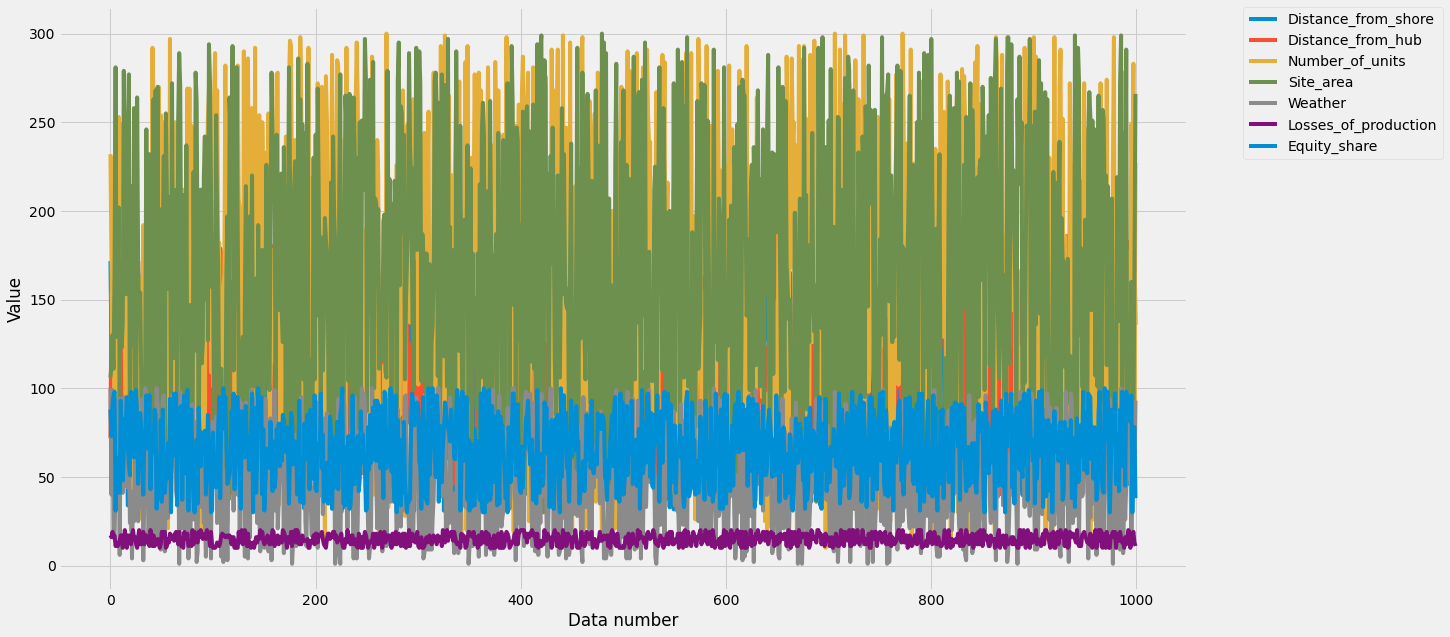

In [26]:
Project_launch_year_NTP = np.array(dataGenerator(0,4,2021,size,'int')) #year up to 2025
Installation_year = np.array(dataGenerator(0,7,2023,size,'int')) #year up to 2030

Distance_from_shore = np.array(dataGenerator(0,150,30,size,'other')) #up to 2030
Distance_from_hub = np.array(dataGenerator(0,150,40,size,'other')) #up to 2030

Number_of_units = np.array(dataGenerator(10,300,0,size,'int')) # base equal to 0 bz it start from 10 to 300
Site_area = np.array(dataGenerator(30,300,0,size,'int'))
Weather = np.array(dataGenerator(1,100,0,size,'int'))
Losses_of_production = np.array(dataGenerator(10,20,0,size,'int')) #percentage
Equity_share = np.array(dataGenerator(30,100,0,size,'int')) 

plt.figure(figsize=(18,10))


plt.plot(Distance_from_shore, label="Distance_from_shore")
plt.plot(Distance_from_hub, label="Distance_from_hub")

plt.plot(Number_of_units, label="Number_of_units")
plt.plot(Site_area, label="Site_area")
plt.plot(Weather, label="Weather")
plt.plot(Losses_of_production, label="Losses_of_production")
plt.plot(Equity_share, label="Equity_share")



plt.ylabel('Value')
plt.xlabel('Data number')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()



In [27]:
df3 = pd.DataFrame({ 'ID': range(0,size), 'Project launch year NTP':Project_launch_year_NTP, 'Installation year':Installation_year, 
                    'Distance from shore':Distance_from_shore,
                   'Distance from hub':Distance_from_hub,
                   'Number of units':Number_of_units,
                   'Site area':Site_area,
                   'Weather':Weather,
                   'Losses of production':Losses_of_production,
                   'Equity share':Equity_share
                   })
df3


,ID,Project launch year NTP,Installation year,Distance from shore,Distance from hub,Number of units,Site area,Weather,Losses of production,Equity share
0,0,2022,2028,171.72,71.81,232,106,100,17,88
1,1,2022,2027,122.06,154.31,173,113,40,16,73
2,2,2023,2024,92.18,47.48,107,130,99,19,91
3,3,2021,2023,86.73,177.76,230,111,17,16,96
4,4,2024,2025,105.43,179.25,100,165,15,17,98
...,...,...,...,...,...,...,...,...,...,...
995,995,2024,2026,76.41,159.95,249,160,15,13,96
996,996,2024,2023,121.93,133.77,219,76,44,17,30
997,997,2022,2026,70.06,153.70,283,70,82,19,78
998,998,2021,2023,63.24,186.94,83,166,43,13,78


In [28]:
df3.to_csv ('tableThree.csv', index = False, header=True)

In [29]:
df3

,ID,Project launch year NTP,Installation year,Distance from shore,Distance from hub,Number of units,Site area,Weather,Losses of production,Equity share
0,0,2022,2028,171.72,71.81,232,106,100,17,88
1,1,2022,2027,122.06,154.31,173,113,40,16,73
2,2,2023,2024,92.18,47.48,107,130,99,19,91
3,3,2021,2023,86.73,177.76,230,111,17,16,96
4,4,2024,2025,105.43,179.25,100,165,15,17,98
...,...,...,...,...,...,...,...,...,...,...
995,995,2024,2026,76.41,159.95,249,160,15,13,96
996,996,2024,2023,121.93,133.77,219,76,44,17,30
997,997,2022,2026,70.06,153.70,283,70,82,19,78
998,998,2021,2023,63.24,186.94,83,166,43,13,78


# Combine tables

In [30]:
df2 = df2.drop(columns=['ID'])
df3 = df3.drop(columns=['ID'])
finaldf = pd.concat([df, df2, df3], axis=1)
finaldf

,ID,Turbine EXW,Transport,Customizations,Hub activities,Hub rental,Installation,Commissioning,Commissioning vessel,Installation vessel,Wind speed,Air density,Water depth,Country,Inflation,Project launch year NTP,Installation year,Distance from shore,Distance from hub,Number of units,Site area,Weather,Losses of production,Equity share
0,0,11041.682389,663.013056,502.419725,262.720236,281.461610,289.785651,390.102211,547.961291,385.844899,11.57,2.31,62.05,dk,4.14,2022,2028,171.72,71.81,232,106,100,17,88
1,1,11573.091923,670.655137,524.012344,287.867066,292.400261,299.857084,450.788582,615.301455,407.153144,8.91,2.34,39.72,fj,6.38,2022,2027,122.06,154.31,173,113,40,16,73
2,2,11765.714836,674.513719,589.315677,314.900162,295.411580,318.717597,454.999984,617.218273,424.294528,8.42,2.28,43.49,ua,4.61,2023,2024,92.18,47.48,107,130,99,19,91
3,3,12437.894565,696.589966,592.712365,343.774837,311.156895,319.400146,465.340779,627.252068,427.224679,8.32,2.31,72.09,cy,7.34,2021,2023,86.73,177.76,230,111,17,16,96
4,4,12482.751844,703.185826,599.078255,345.575052,314.985219,322.394768,476.107724,638.464222,428.868138,10.19,2.39,67.55,sr,4.71,2024,2025,105.43,179.25,100,165,15,17,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,26979.843319,1332.597899,1308.977543,649.257009,682.477068,675.641267,924.893597,1306.357166,928.985590,9.22,2.27,42.68,pa,7.35,2024,2026,76.41,159.95,249,160,15,13,96
996,996,26989.542786,1350.388936,1325.910825,662.978464,683.691243,675.835418,939.351266,1307.551218,934.682512,10.52,2.28,30.45,bn,5.96,2024,2023,121.93,133.77,219,76,44,17,30
997,997,27827.345900,1376.664848,1328.834297,664.059081,686.178971,676.092215,949.391235,1309.607839,937.363767,8.93,2.36,70.38,mx,3.73,2022,2026,70.06,153.70,283,70,82,19,78
998,998,27977.421523,1381.144542,1332.648485,667.301125,693.825077,707.622655,976.308481,1325.657713,940.971488,10.29,2.34,74.06,gw,6.88,2021,2023,63.24,186.94,83,166,43,13,78


In [31]:
finaldf.to_csv ('combinedtables.csv', index = False, header=True)

In [32]:
finaldf

,ID,Turbine EXW,Transport,Customizations,Hub activities,Hub rental,Installation,Commissioning,Commissioning vessel,Installation vessel,Wind speed,Air density,Water depth,Country,Inflation,Project launch year NTP,Installation year,Distance from shore,Distance from hub,Number of units,Site area,Weather,Losses of production,Equity share
0,0,11041.682389,663.013056,502.419725,262.720236,281.461610,289.785651,390.102211,547.961291,385.844899,11.57,2.31,62.05,dk,4.14,2022,2028,171.72,71.81,232,106,100,17,88
1,1,11573.091923,670.655137,524.012344,287.867066,292.400261,299.857084,450.788582,615.301455,407.153144,8.91,2.34,39.72,fj,6.38,2022,2027,122.06,154.31,173,113,40,16,73
2,2,11765.714836,674.513719,589.315677,314.900162,295.411580,318.717597,454.999984,617.218273,424.294528,8.42,2.28,43.49,ua,4.61,2023,2024,92.18,47.48,107,130,99,19,91
3,3,12437.894565,696.589966,592.712365,343.774837,311.156895,319.400146,465.340779,627.252068,427.224679,8.32,2.31,72.09,cy,7.34,2021,2023,86.73,177.76,230,111,17,16,96
4,4,12482.751844,703.185826,599.078255,345.575052,314.985219,322.394768,476.107724,638.464222,428.868138,10.19,2.39,67.55,sr,4.71,2024,2025,105.43,179.25,100,165,15,17,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,26979.843319,1332.597899,1308.977543,649.257009,682.477068,675.641267,924.893597,1306.357166,928.985590,9.22,2.27,42.68,pa,7.35,2024,2026,76.41,159.95,249,160,15,13,96
996,996,26989.542786,1350.388936,1325.910825,662.978464,683.691243,675.835418,939.351266,1307.551218,934.682512,10.52,2.28,30.45,bn,5.96,2024,2023,121.93,133.77,219,76,44,17,30
997,997,27827.345900,1376.664848,1328.834297,664.059081,686.178971,676.092215,949.391235,1309.607839,937.363767,8.93,2.36,70.38,mx,3.73,2022,2026,70.06,153.70,283,70,82,19,78
998,998,27977.421523,1381.144542,1332.648485,667.301125,693.825077,707.622655,976.308481,1325.657713,940.971488,10.29,2.34,74.06,gw,6.88,2021,2023,63.24,186.94,83,166,43,13,78


In [33]:
#RESULT OF PREDICTION IN DataIKU
RESULTS = pd.DataFrame({ 'evs':['0.99'], 'mae':['233.92'],'mse':['74679.59'], 'mape':['0.012'],'rmse ':['273.27'],
'rmsle':['0.014'],'r2':['0.99'],'pearson':['0.99']})
RESULTS

,evs,mae,mse,mape,rmse,rmsle,r2,pearson
0,0.99,233.92,74679.59,0.012,273.27,0.014,0.99,0.99


# Prediction in Colab

data: 1000
data for train: 800


<function matplotlib.pyplot.show>

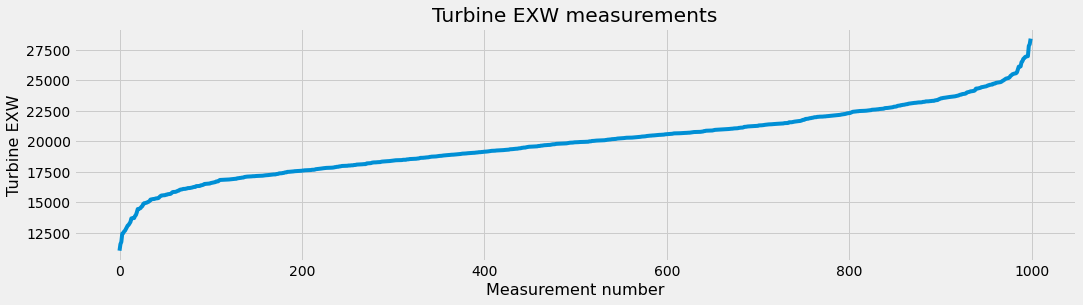

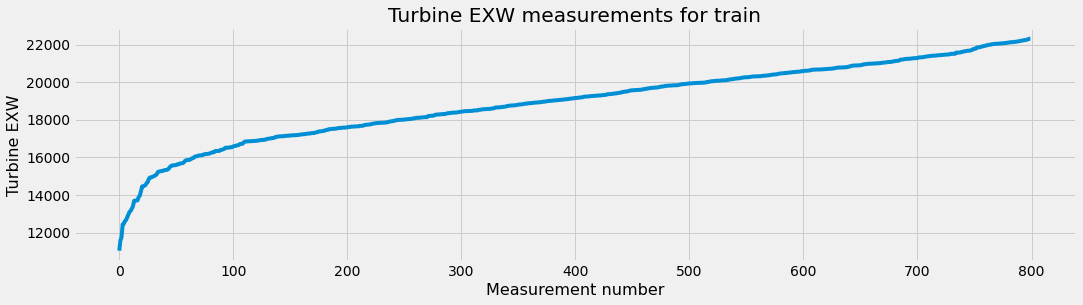

In [34]:
data = finaldf
plt.figure(figsize=(16,4))
plt.title('Turbine EXW measurements')
plt.plot(data['Turbine EXW'])
plt.xlabel('Measurement number', fontsize=16)
plt.ylabel('Turbine EXW', fontsize=16)
plt.show


x=int(len(data)*0.8)
print("data:",len(data))
print("data for train:",x)
plt.figure(figsize=(16,4))
plt.title('Turbine EXW measurements for train')
plt.plot(data['Turbine EXW'][:x])
plt.xlabel('Measurement number', fontsize=16)
plt.ylabel('Turbine EXW', fontsize=16)
plt.show

In [35]:
import math
data_cut = data.filter(['Turbine EXW'])
print(data_cut)
dataset = data_cut.values
dataset
#training_data_len = len(dataset)
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

      Turbine EXW
0    11041.682389
1    11573.091923
2    11765.714836
3    12437.894565
4    12482.751844
..            ...
995  26979.843319
996  26989.542786
997  27827.345900
998  27977.421523
999  28430.235584

[1000 rows x 1 columns]


800

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
#scaled_data

In [37]:
train_data = scaled_data[0:training_data_len,:]
print(len(train_data))
print('train_data', train_data)
x_train = []
y_train = []

for i in range(60, len(train_data)):
  
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print('x_train with a length:', len(x_train),'\n',x_train)
    print(len(y_train))

800
train_data [[0.        ]
 [0.03056088]
 [0.04163845]
 [0.0802949 ]
 [0.0828746 ]
 [0.09026094]
 [0.09416953]
 [0.10241018]
 [0.11074807]
 [0.1186204 ]
 [0.12167644]
 [0.12831156]
 [0.13559165]
 [0.15223532]
 [0.15326917]
 [0.15338877]
 [0.15374961]
 [0.16346807]
 [0.16835166]
 [0.18080422]
 [0.19646346]
 [0.19656641]
 [0.19852375]
 [0.20073576]
 [0.2068345 ]
 [0.20987343]
 [0.219968  ]
 [0.22378927]
 [0.22391915]
 [0.22574993]
 [0.2269175 ]
 [0.22932216]
 [0.23111559]
 [0.23447204]
 [0.24089131]
 [0.24180237]
 [0.24281226]
 [0.2436746 ]
 [0.24384249]
 [0.2453684 ]
 [0.24651065]
 [0.24674071]
 [0.24743547]
 [0.24915577]
 [0.25401655]
 [0.25765309]
 [0.26029852]
 [0.26043267]
 [0.26136879]
 [0.26139849]
 [0.26196586]
 [0.26416054]
 [0.26421897]
 [0.26632512]
 [0.26668914]
 [0.26742215]
 [0.26810253]
 [0.27138016]
 [0.2755667 ]
 [0.27689104]
 [0.27704681]
 [0.277263  ]
 [0.27836199]
 [0.28044733]
 [0.28235241]
 [0.28330755]
 [0.28682983]
 [0.28829986]
 [0.28861145]
 [0.29003422]
 [0.2

In [38]:
x_train, y_train= np.array(x_train), np.array(y_train)

In [39]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(740, 60, 1)

In [40]:
pip install seq2seq-lstm

  Created wheel for seq2seq-lstm: filename=seq2seq_lstm-0.1.4-cp37-none-any.whl size=14626 sha256=444a27a49ac7c2b96a9824ce6bb2f73b2bac39babe74fc173c7b5dc4a1e4c492
  Stored in directory: /root/.cache/pip/wheels/22/fb/c9/c48f5b1e28e2ee101b3880f8a472d8f85f5681dac84449aedb
Successfully built seq2seq-lstm


In [41]:
from keras.models import Sequential
from keras.layers import Dense,LSTM



model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [42]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [43]:
#train the model
model.fit(x_train,y_train,batch_size=1, epochs=10)

Epoch 1/10
740/740 [==============================] - 20s 23ms/step - loss: 0.0061
Epoch 2/10
740/740 [==============================] - 17s 23ms/step - loss: 1.0559e-05
Epoch 3/10
740/740 [==============================] - 17s 23ms/step - loss: 3.8616e-05
Epoch 4/10
740/740 [==============================] - 17s 22ms/step - loss: 2.5630e-05
Epoch 5/10
740/740 [==============================] - 17s 23ms/step - loss: 8.7306e-05
Epoch 6/10
740/740 [==============================] - 16s 22ms/step - loss: 4.8589e-05
Epoch 7/10
740/740 [==============================] - 17s 22ms/step - loss: 3.0291e-05
Epoch 8/10
740/740 [==============================] - 18s 24ms/step - loss: 5.0560e-05
Epoch 9/10
740/740 [==============================] - 17s 23ms/step - loss: 4.7883e-05
Epoch 10/10
740/740 [==============================] - 17s 23ms/step - loss: 9.4146e-06


In [44]:
#create the testing data set
#create a new array containing scaled values from 1543 to 2003
test_data = scaled_data[training_data_len-60:,:]
#create data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [45]:
#convert the data to a numpy array
x_test = np.array(x_test)


In [46]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [47]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [48]:
#Evaluete the model 
#RMSE (Root mean squarred error)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

298.9476992850116

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


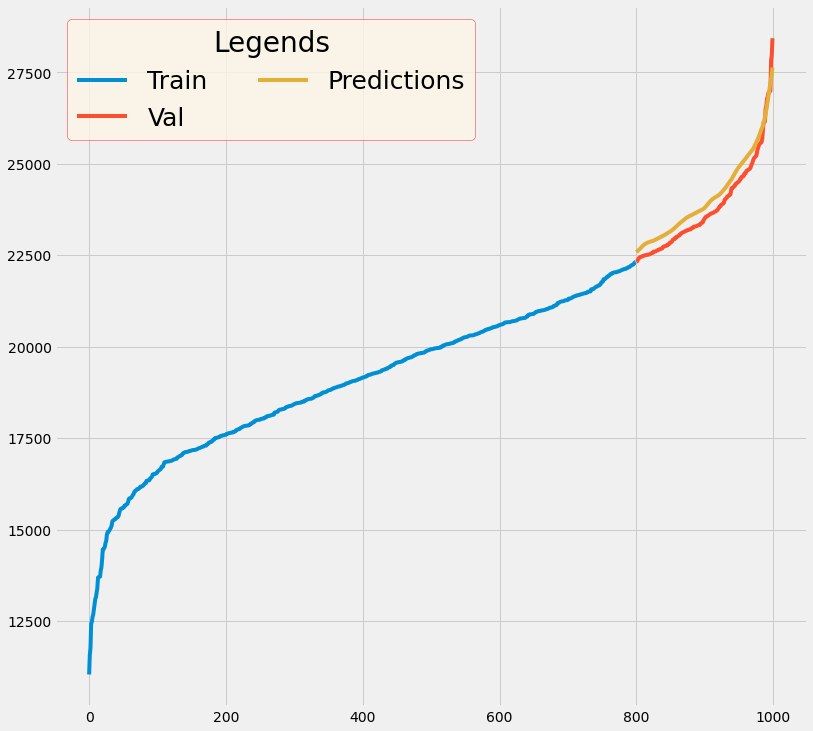

In [49]:
import numpy as np
import matplotlib.pyplot as plt
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

fig, ax = plt.subplots()

ax.plot(train['Turbine EXW'], label = 'Train')
ax.plot(valid['Turbine EXW'], label = 'Val')
ax.plot(valid['Predictions'], label = 'Predictions')


ax.legend(fontsize = 25,
          ncol = 2,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          title = 'Legends',    #  заголовок
          title_fontsize = '28'    #  размер шрифта заголовка
         )

fig.set_figwidth(12)
fig.set_figheight(12)

plt.show()

In [50]:
'''
#plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,16))
plt.title('Model')
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Turbine EXW',fontsize=16)
plt.plot(train['Turbine EXW'])
plt.plot(valid[['Turbine EXW','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()
'''

"\n#plot data\ntrain = data[:training_data_len]\nvalid = data[training_data_len:]\nvalid['Predictions'] = predictions\nplt.figure(figsize=(16,16))\nplt.title('Model')\nplt.xlabel('Date',fontsize = 16)\nplt.ylabel('Turbine EXW',fontsize=16)\nplt.plot(train['Turbine EXW'])\nplt.plot(valid[['Turbine EXW','Predictions']])\nplt.legend(['Train','Val','Predictions'],loc='lower right')\nplt.show()\n"

In [51]:
valid

,ID,Turbine EXW,Transport,Customizations,Hub activities,Hub rental,Installation,Commissioning,Commissioning vessel,Installation vessel,Wind speed,Air density,Water depth,Country,Inflation,Project launch year NTP,Installation year,Distance from shore,Distance from hub,Number of units,Site area,Weather,Losses of production,Equity share,Predictions
800,800,22323.499644,1111.078097,1112.436823,553.015836,557.656122,559.295514,783.872455,1108.575065,777.826654,11.38,2.30,76.94,ki,3.38,2025,2025,150.10,141.52,205,297,75,16,49,22586.802734
801,801,22333.232367,1112.146813,1114.191363,553.059941,557.955247,559.427264,784.844116,1109.433722,778.523581,8.66,2.31,60.39,bb,4.98,2025,2028,58.25,113.19,16,214,25,12,39,22601.886719
802,802,22368.143956,1112.534694,1114.773402,553.215928,557.997845,559.532607,785.716296,1110.051158,778.570900,9.17,2.35,46.05,bo,6.90,2021,2024,100.28,54.55,46,150,76,14,96,22616.757812
803,803,22399.781154,1112.786224,1114.791423,553.319737,558.008993,561.487676,785.801416,1110.225523,778.582792,11.81,2.40,52.29,fr,6.98,2023,2030,136.75,87.83,166,81,99,19,59,22632.898438
804,804,22430.867642,1113.466201,1114.855304,553.501643,558.056105,561.538168,785.849357,1110.642210,779.240176,10.65,2.41,34.32,kr,4.77,2025,2028,90.65,148.87,235,170,31,15,89,22650.941406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,26979.843319,1332.597899,1308.977543,649.257009,682.477068,675.641267,924.893597,1306.357166,928.985590,9.22,2.27,42.68,pa,7.35,2024,2026,76.41,159.95,249,160,15,13,96,27099.353516
996,996,26989.542786,1350.388936,1325.910825,662.978464,683.691243,675.835418,939.351266,1307.551218,934.682512,10.52,2.28,30.45,bn,5.96,2024,2023,121.93,133.77,219,76,44,17,30,27214.603516
997,997,27827.345900,1376.664848,1328.834297,664.059081,686.178971,676.092215,949.391235,1309.607839,937.363767,8.93,2.36,70.38,mx,3.73,2022,2026,70.06,153.70,283,70,82,19,78,27316.369141
998,998,27977.421523,1381.144542,1332.648485,667.301125,693.825077,707.622655,976.308481,1325.657713,940.971488,10.29,2.34,74.06,gw,6.88,2021,2023,63.24,186.94,83,166,43,13,78,27460.337891
